<a href="https://colab.research.google.com/github/Kashishsingh-26/Module2_Lab01/blob/main/Mod2_lab1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt


In [3]:
# Loading the dataset
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
# Removing rows which have missing values

data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [5]:
# Dividing the dataset into features (X) and the target variable (y)

X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])


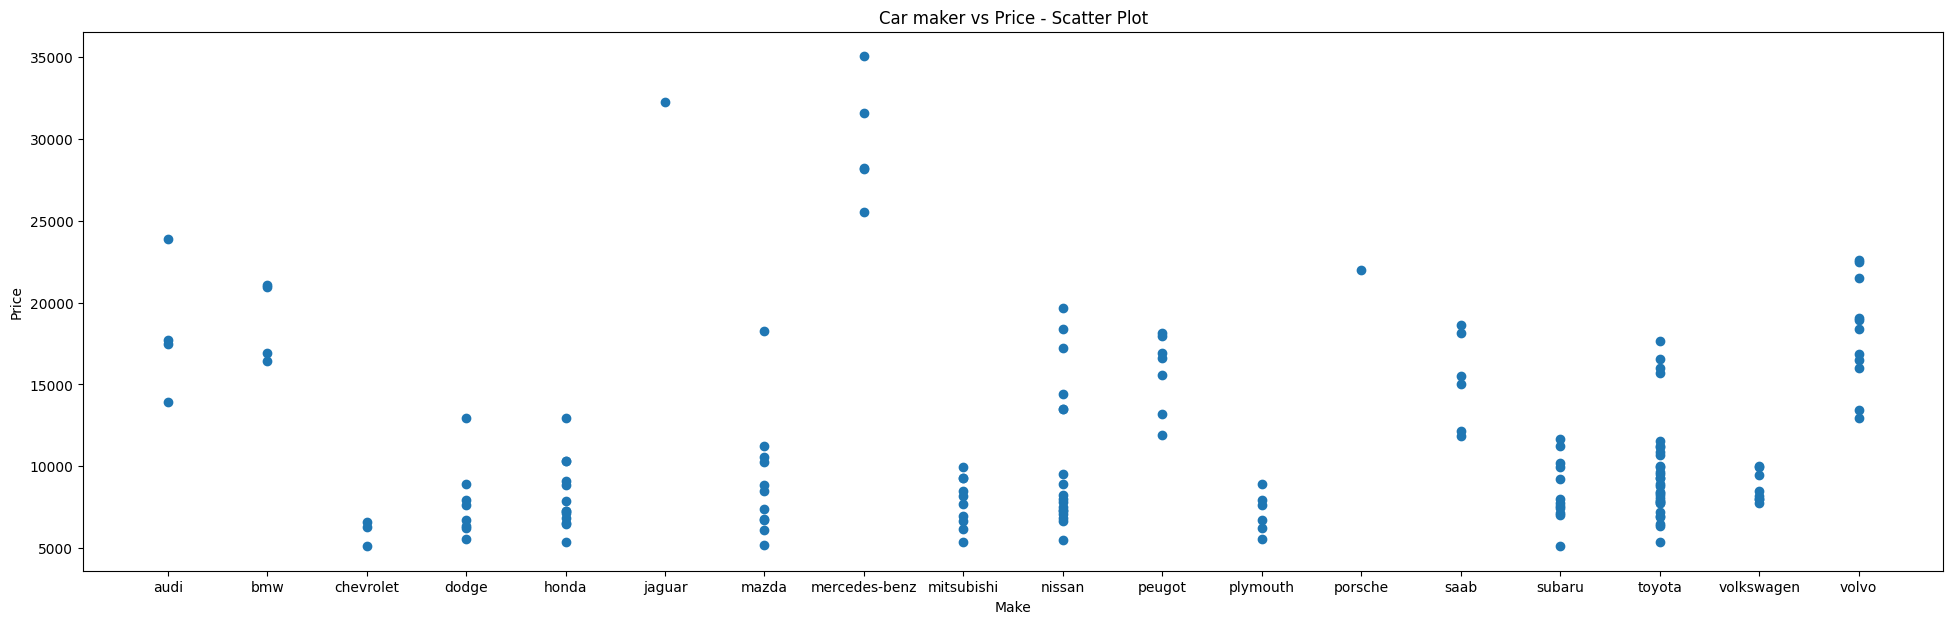

In [6]:
plt.figure(figsize = (24, 7))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

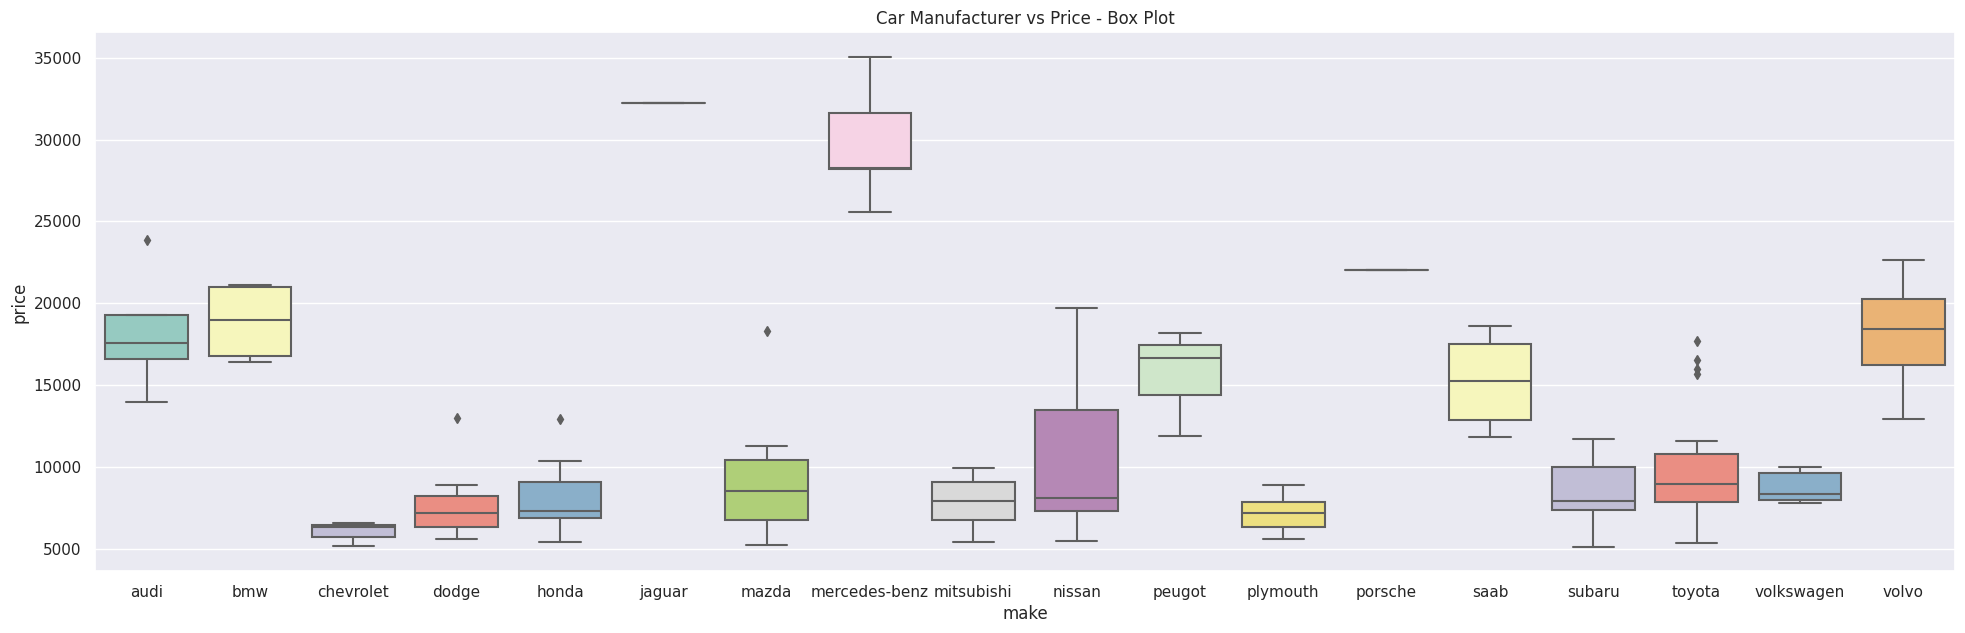

In [7]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')

Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

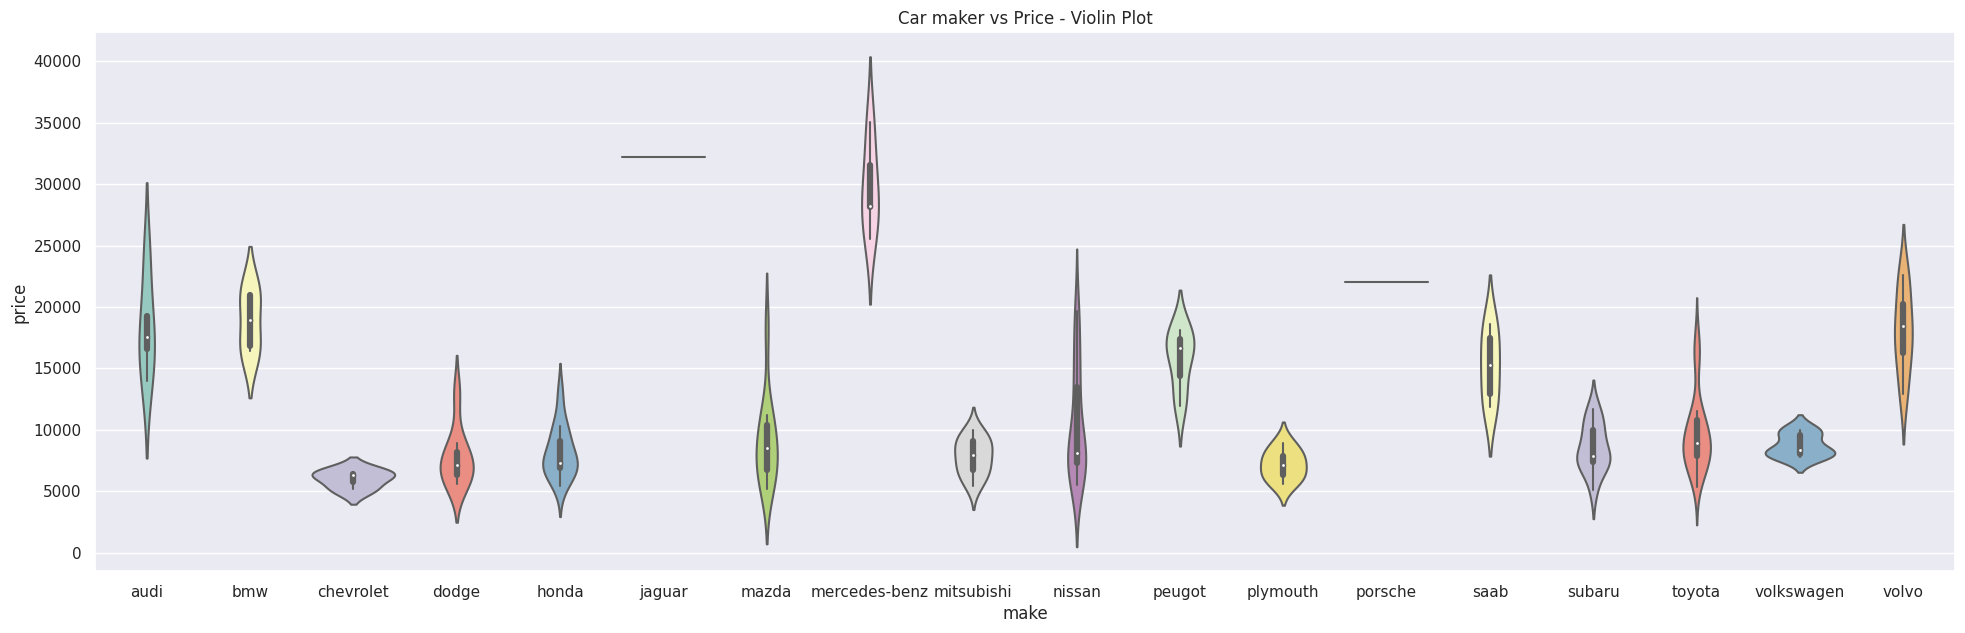

In [8]:
sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')

Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

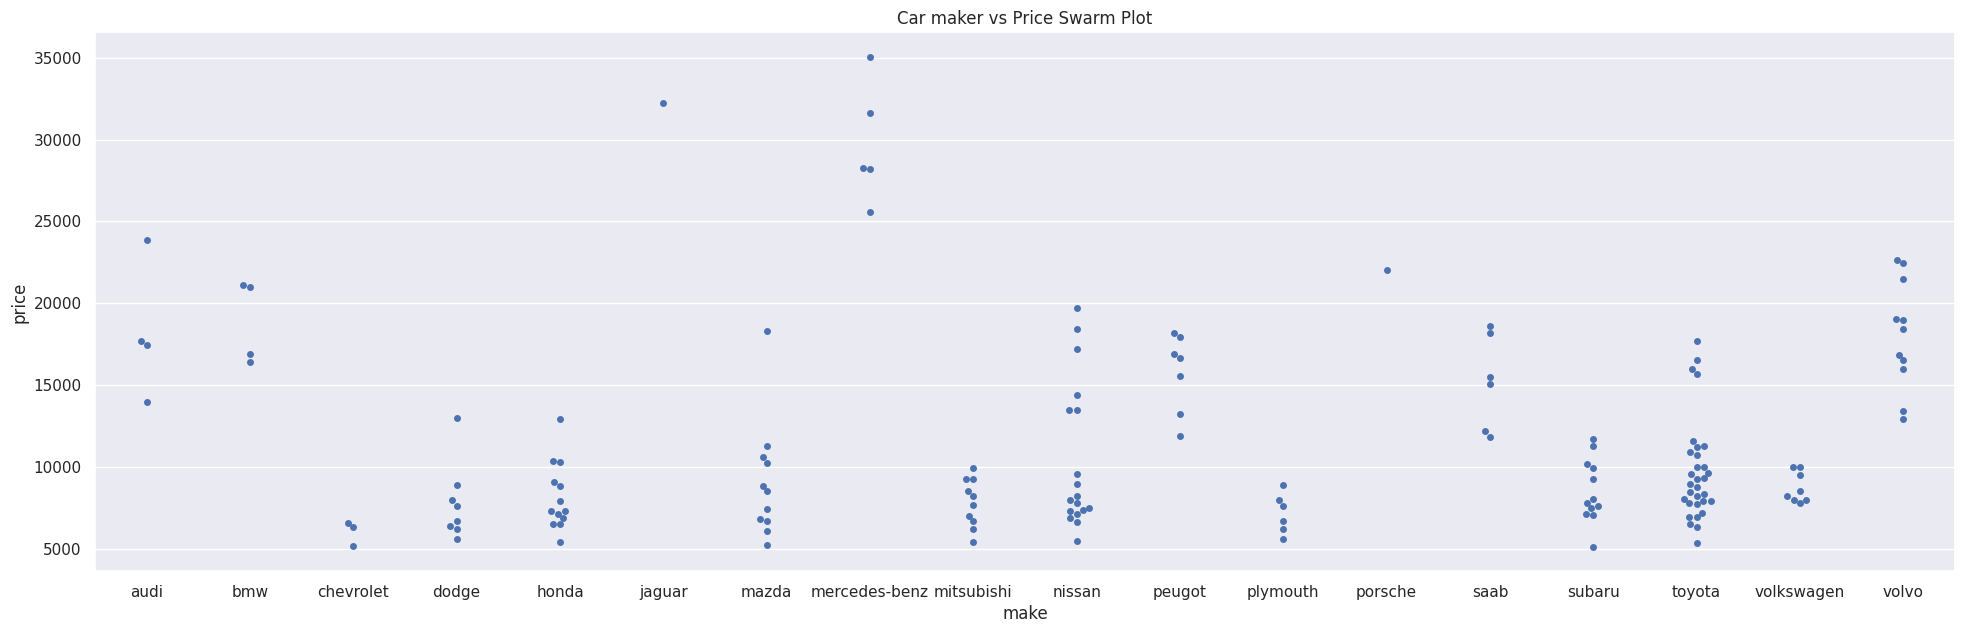

In [9]:
sns.swarmplot(x=X["make"],y=y).set_title('Car maker vs Price Swarm Plot')

Text(0.5, 1.0, 'Car maker vs Horsepower Box')

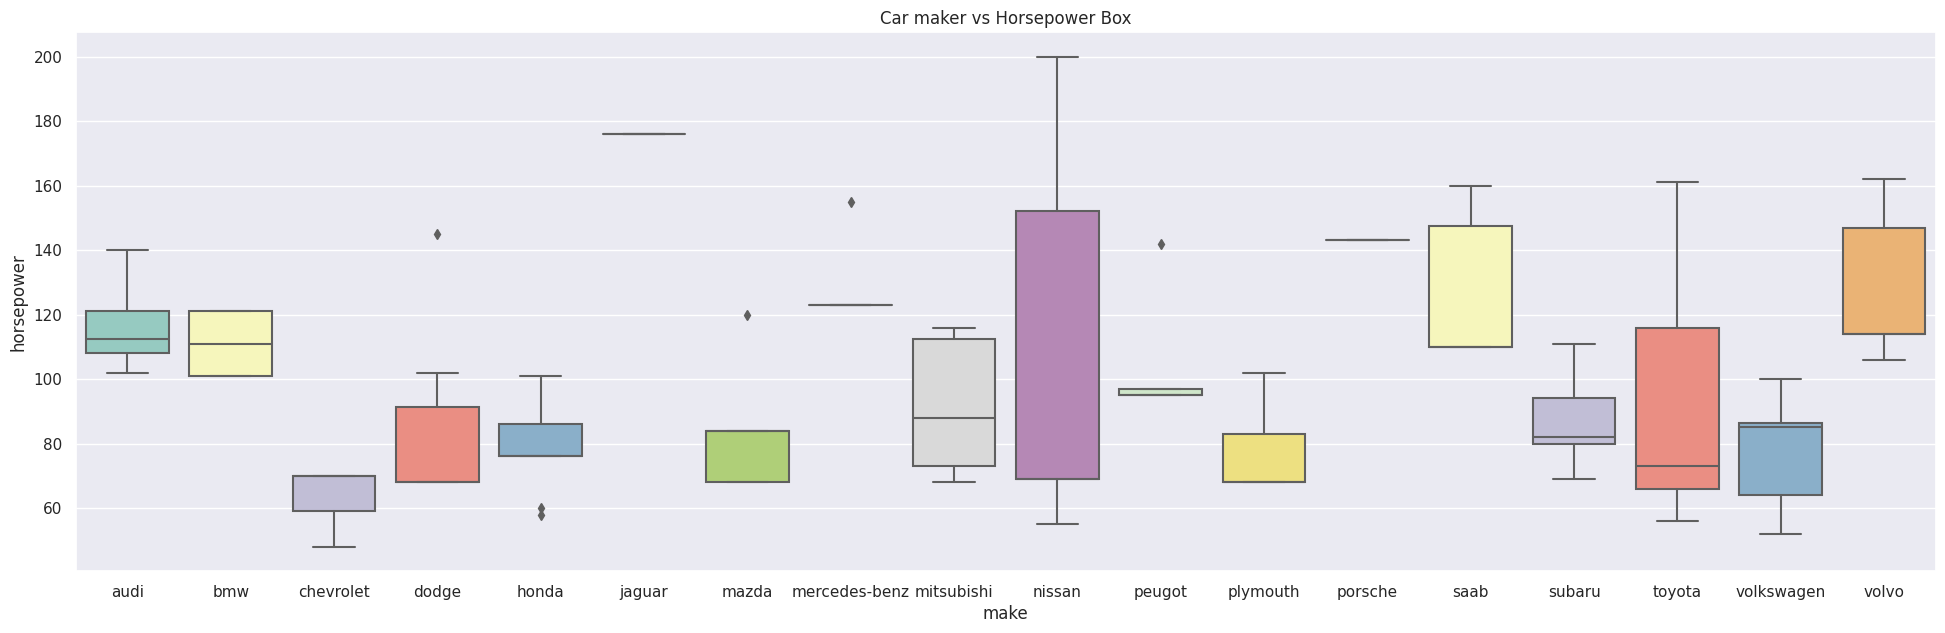

In [12]:
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box')

<Axes: xlabel='horsepower', ylabel='price'>

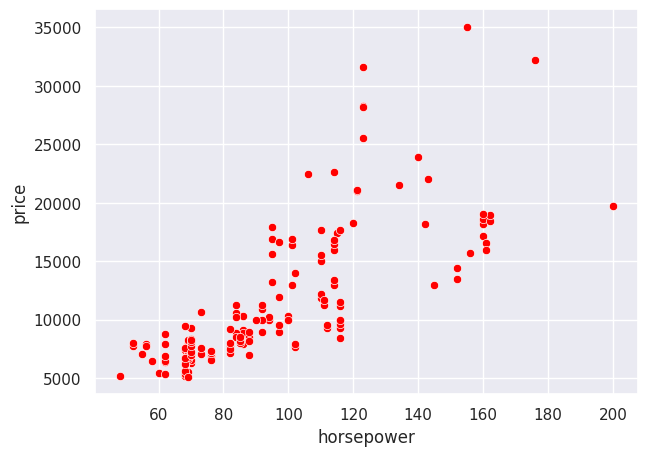

In [13]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y = y, color = "red")

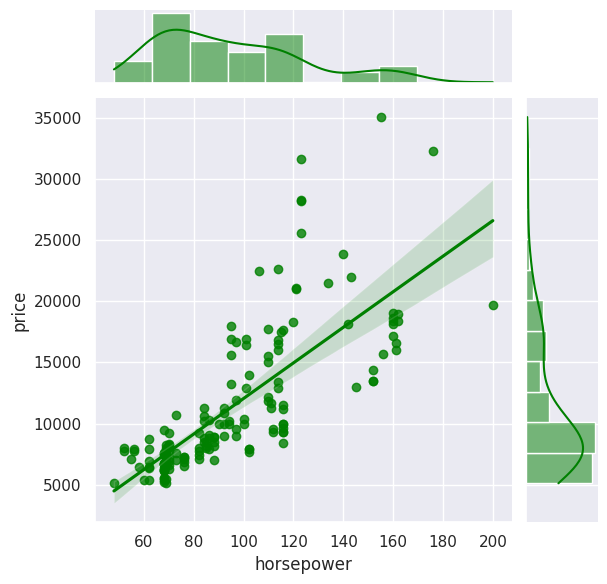

In [14]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'green')


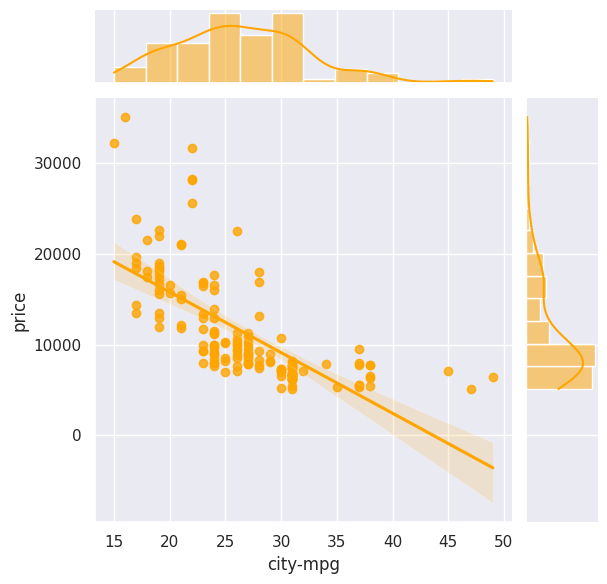

In [15]:

feature = "city-mpg"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'orange')

Text(0.5, 1.0, 'Body style vs Price Box Plot')

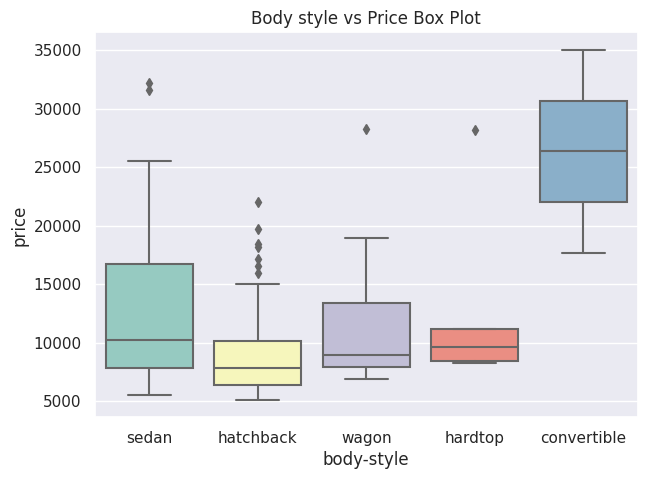

In [16]:

sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')

Question: Interpret the plot below. List all the interpretations point by point using the plot below.
Some pointers:

Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?
ANS: The "cost" depends on how much time, money, and effort you need to put into maintaining your body to keep it looking and feeling the way you want.

Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?
ANS: Bringing in the interquartile range adds a helpful layer to the analysis. The interquartile range gives you an idea of how spread out the values are in the middle 50% of a set of data. In the context of body types, this could represent the variability in the "cost" or maintenance requirements for a more typical range of bodies.

Do you think the body-style of a car can be a good predictor for its price?
ANS: the body style of a car is often a strong predictor of its price. Different body styles cater to different preferences, needs, and lifestyles, and these factors can significantly influence the market demand and, consequently, the price